## Imports

In [1]:
# Installed
import os
import sys
import obspy
import numpy as np
import matplotlib.pyplot as plt
sys.path.insert(0, '..')

# Local
import madpy.amplitude as amp
import madpy.duration as dur

In [2]:
st_amp = obspy.read('amp.mseed', format='MSEED')
for tr in st_amp:
    tr.stats.o = obspy.UTCDateTime('2013-09-01T09:45:36.83')
    tr.stats.p = 6.5944
    tr.stats.s = 10.6356
    tr.data = tr.data * 1e3 # convert from m to mm

In [3]:
df_amp, fig_amp = amp.measure_amplitude(st_amp.copy())

In [4]:
df_amp.head()

,date,time,network,station,channel,amplitude,noise
0,2013-09-01,09:45:36.83,WY,YNR,HHE,0.852588,0.010126


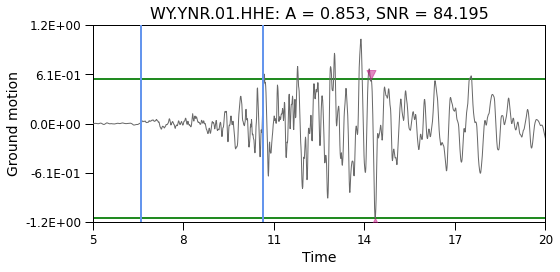

In [5]:
fig_amp

In [14]:
fig_amp.savefig('amp_figure.jpeg')

In [7]:
st_dur = obspy.read('dur.mseed', format='MSEED')
for tr in st_dur:
    tr.stats.o = obspy.UTCDateTime('2013-09-01T09:45:36.83')
    tr.stats.p = 6.5944
    tr.stats.s = 10.6356
    tr.detrend('demean')
    tr.taper(max_percentage=0.05)
    tr.filter('bandpass', freqmin=1, freqmax=8)

In [8]:
df_dur, fig_dur = dur.measure_duration(st_dur.copy())

In [9]:
df_dur.head()

,date,time,network,station,channel,duration,cc,noise
0,2013-09-01,09:45:36.83,WY,YNR,HHZ,72.046,-0.936286,1.839397e-08


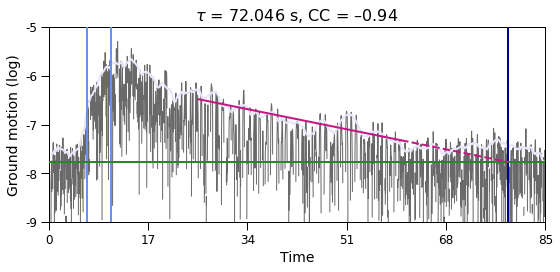

In [10]:
fig_dur

In [15]:
fig_dur.savefig('dur_figure.jpeg') 